# 🧬 Single-Cell RNA-seq Analysis with Scanpy

This notebook walks through a **complete single-cell RNA-seq (scRNA-seq)** data analysis pipeline using the Python package **Scanpy**.  
It is written for **beginners** in single-cell bioinformatics — especially those coming from a biology background.

We'll go step-by-step through:
1. Loading and preprocessing data  
2. Quality control (QC)  
3. Normalization and feature selection  
4. Dimensionality reduction (PCA, UMAP)  
5. Clustering  
6. Marker gene detection and visualization

By the end of this notebook, you’ll understand not only *how* to perform each step, but also *why* it’s important.

---


In [1]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 3.6 MB/s eta 0:00:00


In [2]:
!pip install anndata

In [3]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 70.1 MB/s eta 0:00:00


In [4]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.0 MB/s eta 0:00:00


In [5]:
!pip install decoupler

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=d40f4d3e45d9520de1210f10a281b677e807126930b09ff6b308696d44f0a603
  Stored in directory: /root/.cache/pip/wheels/d6/19/ee/0a6a1793d91c449563b49ccab57ce52da3e6fab7614836bd8c
Successfully built docrep
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [6]:
!pip install fa2-modified

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fa2-modified: filename=fa2_modified-0.3.10-cp312-cp312-linux_x86_64.whl size=493274 sha256=00f055e114ef390f908fe5959ae832343292017d406ba6b28e2ab4d186a73607
  Stored in directory: /root/.cache/pip/wheels/e7/b5/c2/e87afecc23dc78723045cde9a733677ee2b3c1374a7ed3a5e8
Successfully built fa2-modified


In [7]:
#Import core single cell datasets

import scanpy as sc
import anndata as ad

/usr/local/lib/python3.12/dist-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/usr/local/lib/python3.12/dist-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/usr/local/lib/python3.12/dist-packages/scanpy/readwrite.py:16: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


In [8]:
!wget https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5

--2025-10-20 01:35:33--  https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65402953 (62M) [application/x-hdf5]
Saving to: ‘10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5’

10k_5p_Human_diseas 100%[===================>]  62.37M  17.0MB/s    in 3.7s    

2025-10-20 01:35:37 (17.0 MB/s) - ‘10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5’ saved [65402953/65402953]



In [9]:
fresh_blood_adata = sc.read_10x_h5('10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5')

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


### 🧩 Loading Data
In this step, we load the single-cell expression matrix into an **AnnData** object — the core data structure in Scanpy.
It contains:
- `adata.X`: the expression matrix (cells × genes)
- `adata.obs`: metadata for each cell
- `adata.var`: metadata for each gene


In [10]:
print(fresh_blood_adata)

AnnData object with n_obs × n_vars = 13853 × 38606
    var: 'gene_ids', 'feature_types', 'genome'


In [11]:
fresh_blood_adata.shape

(13853, 38606)

In [12]:
#13853 cells
#38606 genes

In [13]:
fresh_blood_adata.var.head()

,gene_ids,feature_types,genome
DDX11L2,ENSG00000290825,Gene Expression,GRCh38
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
ENSG00000290826,ENSG00000290826,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38


In [14]:
fresh_blood_adata.obs.head()

""
AAACCAAAGAACAGAC-1
AAACCAAAGCAAGATA-1
AAACCAAAGCTGGTTA-1
AAACCAGCACCTAACG-1
AAACCAGCACGCGTTA-1


In [15]:
fresh_blood_adata.to_df()

,DDX11L2,MIR1302-2HG,FAM138A,ENSG00000290826,OR4F5,ENSG00000238009,ENSG00000239945,ENSG00000239906,ENSG00000241860,ENSG00000241599,...,ENSG00000275249,ENSG00000274792,ENSG00000274175,ENSG00000275869,ENSG00000273554,ENSG00000277836,ENSG00000278633,ENSG00000276017,ENSG00000278817,ENSG00000277196
AAACCAAAGAACAGAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAAAGCAAGATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAAAGCTGGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAGCACCTAACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAGCACGCGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTGTCTTCGTCCATT-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTGTGCAGAAGCCGA-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTGTGCAGATTACAC-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTGTGGGTAATGGGA-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
fresh_blood_adata.obs_keys()

/tmp/ipython-input-923068421.py:1: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  fresh_blood_adata.obs_keys()


[]

In [17]:
fresh_blood_adata.uns_keys()

/tmp/ipython-input-119558665.py:1: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  fresh_blood_adata.uns_keys()


[]

In [18]:
# A useful step for older datasets
fresh_blood_adata.var_names_make_unique()
fresh_blood_adata.obs_names_make_unique()

In [19]:
fresh_blood_adata.var

,gene_ids,feature_types,genome
DDX11L2,ENSG00000290825,Gene Expression,GRCh38
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
ENSG00000290826,ENSG00000290826,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
...,...,...,...
ENSG00000277836,ENSG00000277836,Gene Expression,GRCh38
ENSG00000278633,ENSG00000278633,Gene Expression,GRCh38
ENSG00000276017,ENSG00000276017,Gene Expression,GRCh38
ENSG00000278817,ENSG00000278817,Gene Expression,GRCh38


In [20]:
fresh_blood_adata.obs

""
AAACCAAAGAACAGAC-1
AAACCAAAGCAAGATA-1
AAACCAAAGCTGGTTA-1
AAACCAGCACCTAACG-1
AAACCAGCACGCGTTA-1
...
GTTGTCTTCGTCCATT-2
GTTGTGCAGAAGCCGA-2
GTTGTGCAGATTACAC-2
GTTGTGGGTAATGGGA-2


In [21]:
fresh_blood_adata.var_names

Index(['DDX11L2', 'MIR1302-2HG', 'FAM138A', 'ENSG00000290826', 'OR4F5',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000239906',
       'ENSG00000241860', 'ENSG00000241599',
       ...
       'ENSG00000275249', 'ENSG00000274792', 'ENSG00000274175',
       'ENSG00000275869', 'ENSG00000273554', 'ENSG00000277836',
       'ENSG00000278633', 'ENSG00000276017', 'ENSG00000278817',
       'ENSG00000277196'],
      dtype='object', length=38606)

In [22]:
fresh_blood_adata.var['MT'] = fresh_blood_adata.var_names.str.startswith("MT-")
fresh_blood_adata.var['RIBO'] = fresh_blood_adata.var_names.str.startswith("RPS", "RPL")
fresh_blood_adata.var['HB'] = fresh_blood_adata.var_names.str.startswith("^HB[^(P)]")

In [23]:
fresh_blood_adata.var['MT']

,MT
DDX11L2,False
MIR1302-2HG,False
FAM138A,False
ENSG00000290826,False
OR4F5,False
...,...
ENSG00000277836,False
ENSG00000278633,False
ENSG00000276017,False
ENSG00000278817,False


In [24]:
mt_genes = fresh_blood_adata.var[fresh_blood_adata.var['MT']]
mt_genes

,gene_ids,feature_types,genome,MT,RIBO,HB
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,True,False,False
MT-ND2,ENSG00000198763,Gene Expression,GRCh38,True,False,False
MT-CO1,ENSG00000198804,Gene Expression,GRCh38,True,False,False
MT-CO2,ENSG00000198712,Gene Expression,GRCh38,True,False,False
MT-ATP8,ENSG00000228253,Gene Expression,GRCh38,True,False,False
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38,True,False,False
MT-CO3,ENSG00000198938,Gene Expression,GRCh38,True,False,False
MT-ND3,ENSG00000198840,Gene Expression,GRCh38,True,False,False
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,False,False
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,False,False


In [25]:
sc.pp.calculate_qc_metrics(
    fresh_blood_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

### 🧹 Quality Control (QC)
QC ensures we only keep high-quality cells and informative genes.
Typical filters remove:
- Cells with too few genes (likely dead)
- Cells with too many genes (possible doublets)
- Genes expressed in very few cells (uninformative)


In [26]:
fresh_blood_adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
AAACCAAAGAACAGAC-1,3351,8.117312,9437.0,9.152499,22.719084,30.772491,41.178341,56.575183,420.0,6.042633,4.450567,479.0,6.173786,5.075766,0.0,0.0,0.0
AAACCAAAGCAAGATA-1,2718,7.908019,9637.0,9.173469,35.872159,49.175054,58.285774,69.959531,351.0,5.863631,3.642212,1455.0,7.283448,15.098059,0.0,0.0,0.0
AAACCAAAGCTGGTTA-1,3262,8.090402,10236.0,9.233764,29.054318,39.576006,49.267292,62.289957,472.0,6.159095,4.611176,1048.0,6.955593,10.238374,0.0,0.0,0.0
AAACCAGCACCTAACG-1,3184,8.066208,9737.0,9.183791,26.887132,36.664270,47.047345,60.778474,349.0,5.857933,3.584266,696.0,6.546785,7.147993,0.0,0.0,0.0
AAACCAGCACGCGTTA-1,3342,8.114624,11524.0,9.352274,28.089205,40.758417,51.292954,64.213815,501.0,6.218600,4.347449,1302.0,7.172425,11.298161,0.0,0.0,0.0


In [27]:
fresh_blood_adata.var.head()

,gene_ids,feature_types,genome,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
DDX11L2,ENSG00000290825,Gene Expression,GRCh38,False,False,False,7,0.000505,0.000505,99.949469,7.0,2.079442
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,False,False,1,0.000072,0.000072,99.992781,1.0,0.693147
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSG00000290826,ENSG00000290826,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000


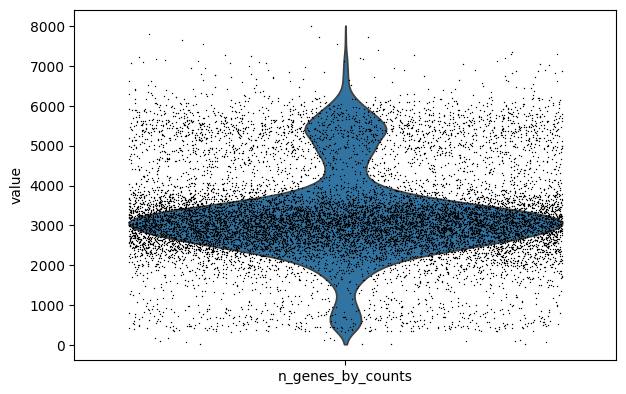

In [28]:
sc.pl.violin(
    fresh_blood_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

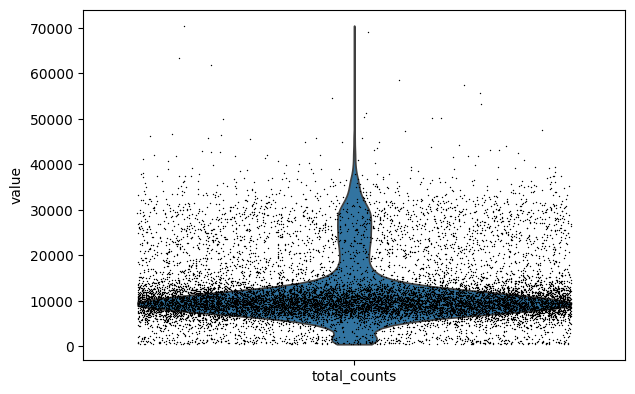

In [29]:
sc.pl.violin(
    fresh_blood_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

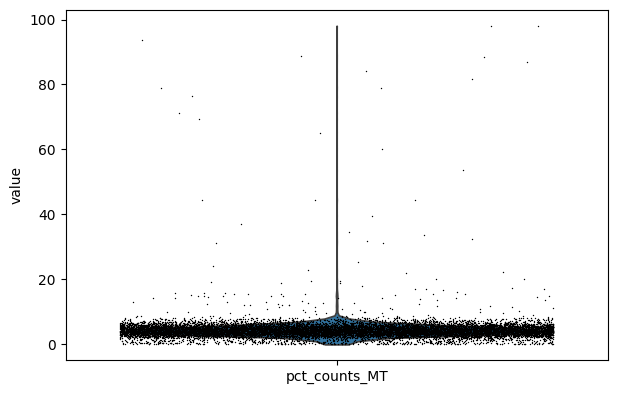

In [30]:
sc.pl.violin(
    fresh_blood_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

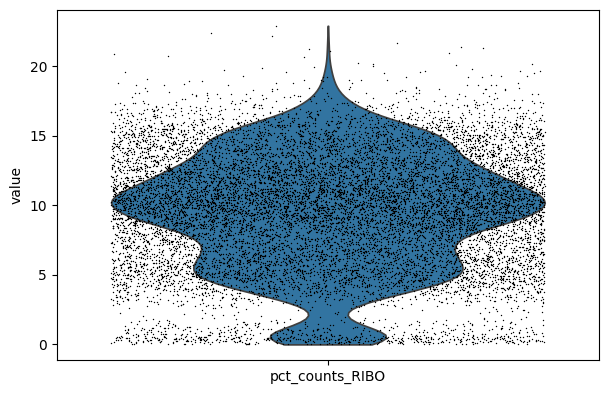

In [31]:
sc.pl.violin(
    fresh_blood_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


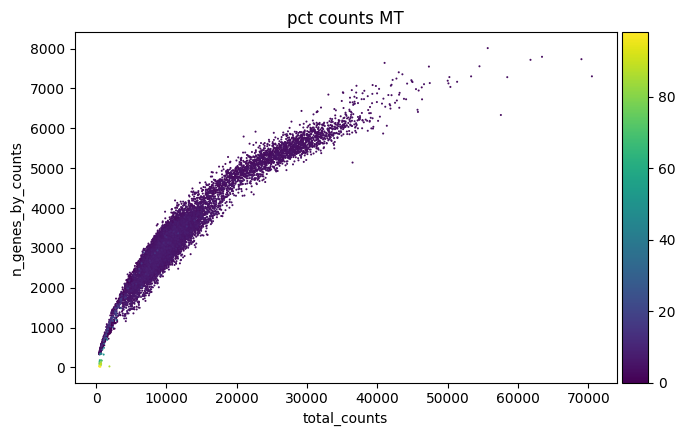

In [32]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


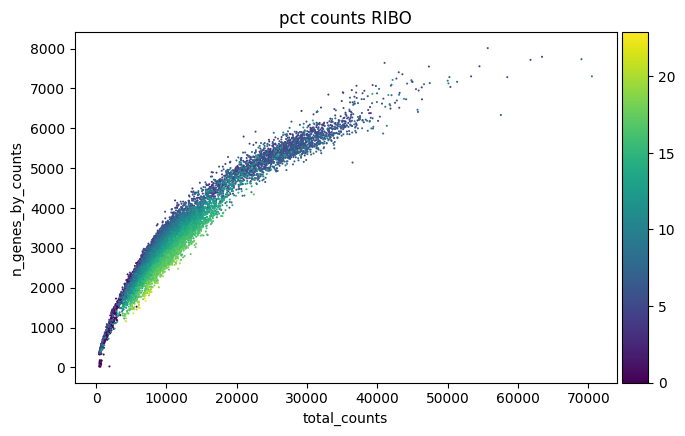

In [33]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


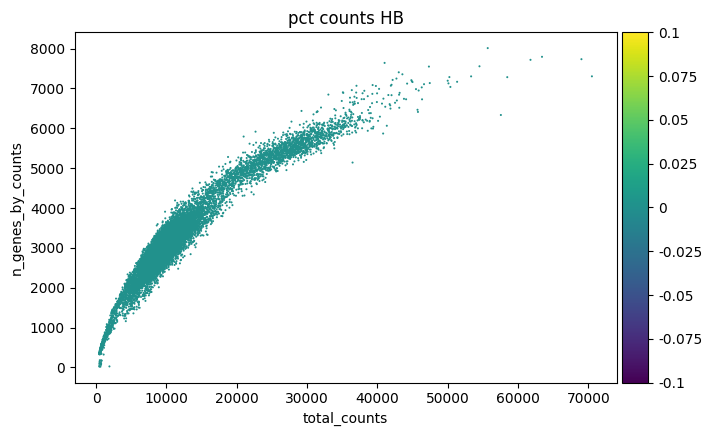

In [34]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [35]:
"""
Additionally, it is important to note that for datasets with multiple batches,
quality control should be performed for each sample individually as quality
control thresholds can vary substantially between batches.
"""

'\nAdditionally, it is important to note that for datasets with multiple batches,\nquality control should be performed for each sample individually as quality\ncontrol thresholds can vary substantially between batches.\n'

In [36]:
sc.pp.filter_cells(fresh_blood_adata, min_genes=1000)
sc.pp.filter_genes(fresh_blood_adata, min_cells=1000)

### 🧹 Quality Control (QC)
QC ensures we only keep high-quality cells and informative genes.
Typical filters remove:
- Cells with too few genes (likely dead)
- Cells with too many genes (possible doublets)
- Genes expressed in very few cells (uninformative)


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


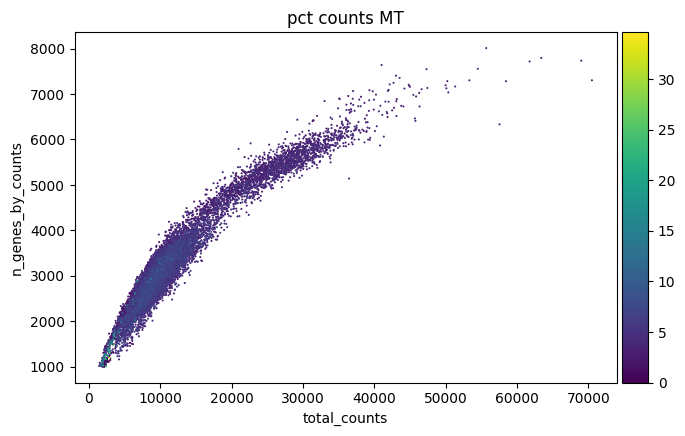

In [37]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

In [38]:
#doublet detection
##Identifying doublets is crucial as they can lead to misclassifications or
##distortions in downstream analysis steps

In [39]:
sc.pp.scrublet(fresh_blood_adata) #if you have multiple batch samples, you can specify it with batch_key="sample"

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


In [40]:
#Normalization

In [41]:
# Save a copy of the data
fresh_blood_adata.layers["counts"] = fresh_blood_adata.X.copy()

In [42]:
# Normalizing to median total counts
sc.pp.normalize_total(fresh_blood_adata)
# Logarithmize the data
sc.pp.log1p(fresh_blood_adata)

### ⚖️ Normalization
Normalization adjusts for sequencing depth differences between cells.
Here, we scale counts so each cell has the same total expression level.

In [43]:
#Feature selection
#selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(fresh_blood_adata, n_top_genes=1000)

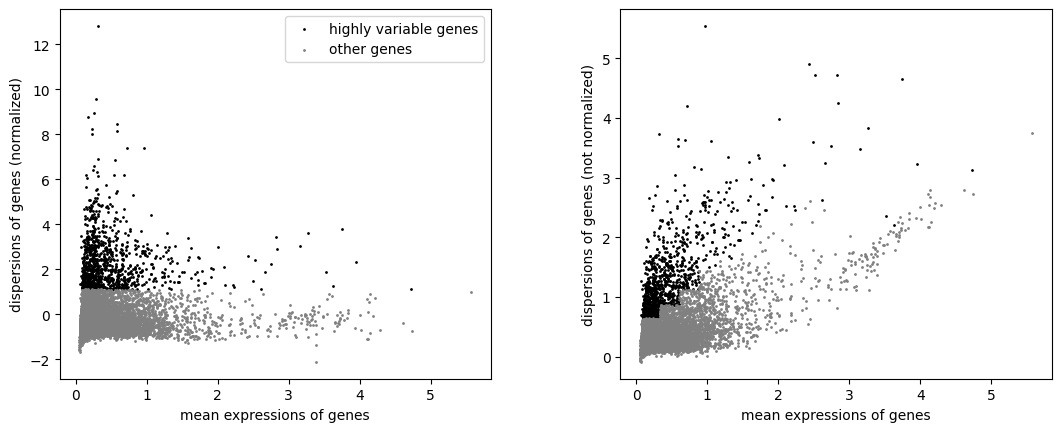

In [44]:
sc.pl.highly_variable_genes(fresh_blood_adata )
#left is normalized
#right is not

In [45]:
sc.tl.pca(fresh_blood_adata)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_pca/__init__.py:245: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")


### 🔍 Dimensionality Reduction (PCA)
We use **Principal Component Analysis (PCA)** to reduce data complexity and highlight key variation patterns.
This makes later steps like clustering and visualization faster and more robust.

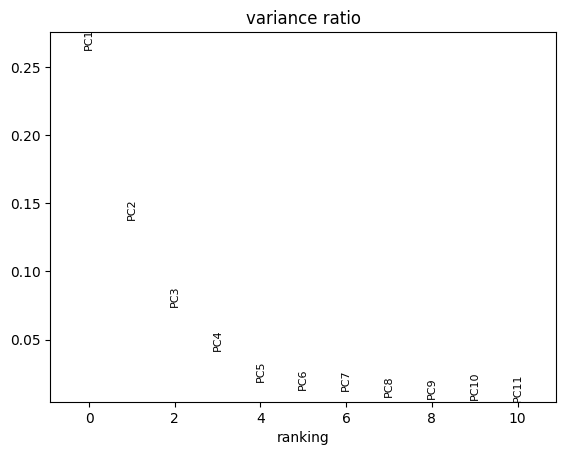

In [46]:
sc.pl.pca_variance_ratio(fresh_blood_adata, n_pcs=10, log=False)

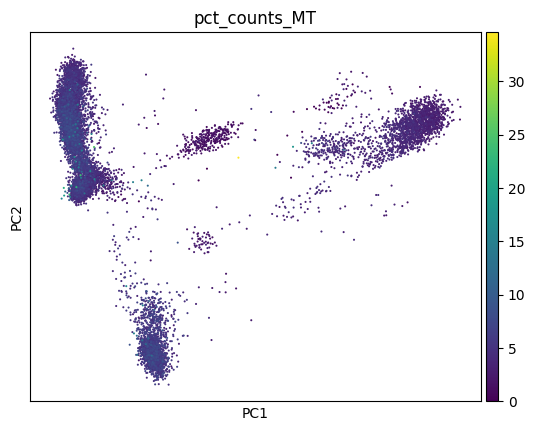

In [47]:
sc.pl.pca(
    fresh_blood_adata,
    color=["pct_counts_MT"]
)

In [48]:
sc.pp.neighbors(fresh_blood_adata, n_neighbors=10, n_pcs=10)

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


In [49]:
fresh_blood_adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB,n_genes,doublet_score,predicted_doublet
AAACCAAAGAACAGAC-1,3351,8.117312,9437.0,9.152499,22.719084,30.772491,41.178341,56.575183,420.0,6.042633,4.450567,479.0,6.173786,5.075766,0.0,0.0,0.0,3351,0.021459,False
AAACCAAAGCAAGATA-1,2718,7.908019,9637.0,9.173469,35.872159,49.175054,58.285774,69.959531,351.0,5.863631,3.642212,1455.0,7.283448,15.098059,0.0,0.0,0.0,2718,0.017483,False
AAACCAAAGCTGGTTA-1,3262,8.090402,10236.0,9.233764,29.054318,39.576006,49.267292,62.289957,472.0,6.159095,4.611176,1048.0,6.955593,10.238374,0.0,0.0,0.0,3262,0.029283,False
AAACCAGCACCTAACG-1,3184,8.066208,9737.0,9.183791,26.887132,36.664270,47.047345,60.778474,349.0,5.857933,3.584266,696.0,6.546785,7.147993,0.0,0.0,0.0,3184,0.011212,False
AAACCAGCACGCGTTA-1,3342,8.114624,11524.0,9.352274,28.089205,40.758417,51.292954,64.213815,501.0,6.218600,4.347449,1302.0,7.172425,11.298161,0.0,0.0,0.0,3342,0.095853,False


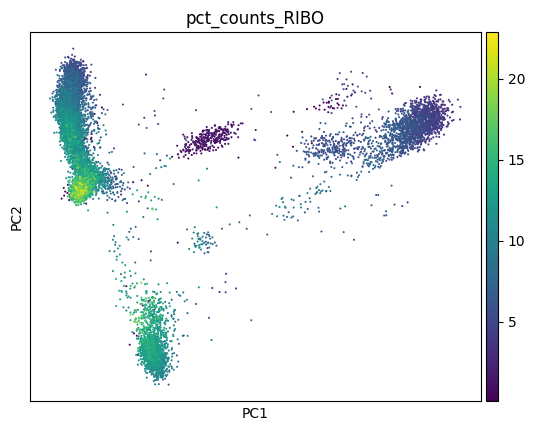

In [50]:
sc.pl.pca(
    fresh_blood_adata,
    color=["pct_counts_RIBO"]
)

In [51]:
## Nearest Neighbour
# Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.
# basically we want to cluster the PCA components

In [52]:
sc.pp.neighbors(fresh_blood_adata)

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


In [53]:
sc.tl.umap(fresh_blood_adata)

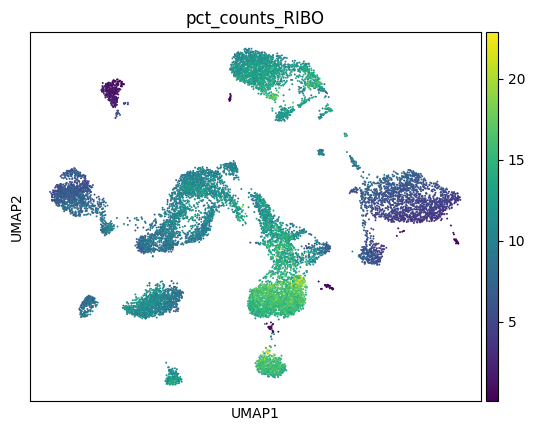

In [54]:
sc.pl.umap(
    fresh_blood_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [55]:
## Clustering by communities.
# Usually used for cell type detection

In [56]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2)

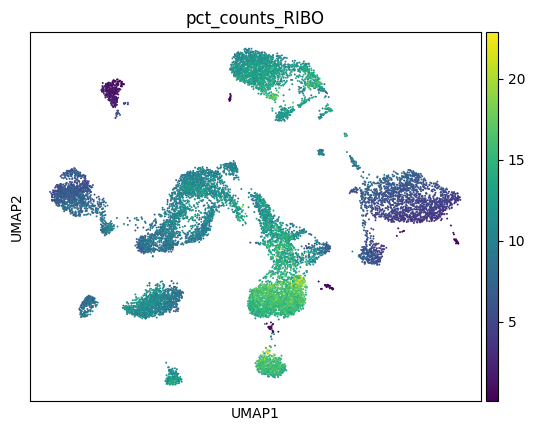

In [57]:
sc.pl.umap(
    fresh_blood_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

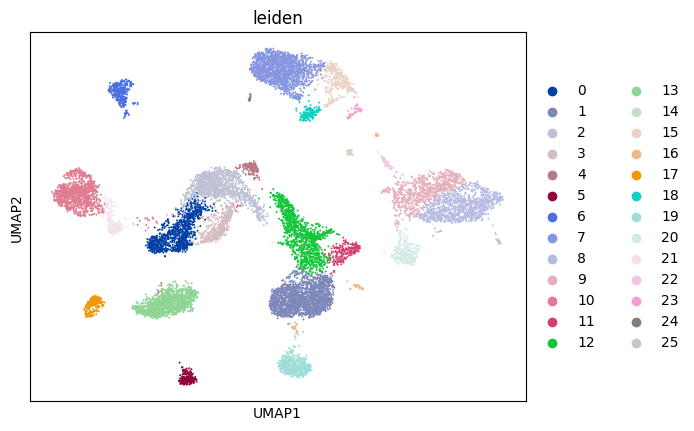

In [60]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden"],
    size=8,
)

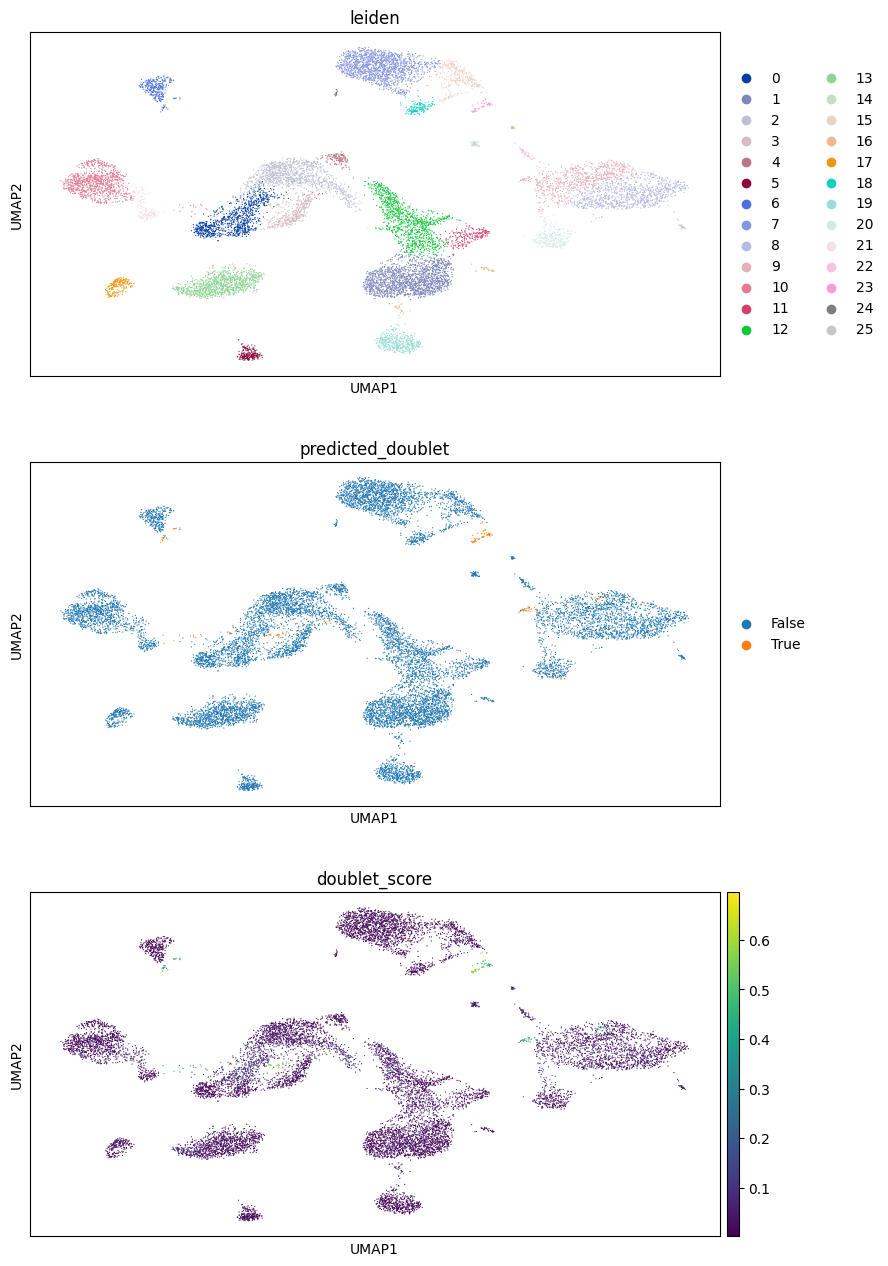

In [59]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [ ]:
#Further reclustering

In [61]:
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

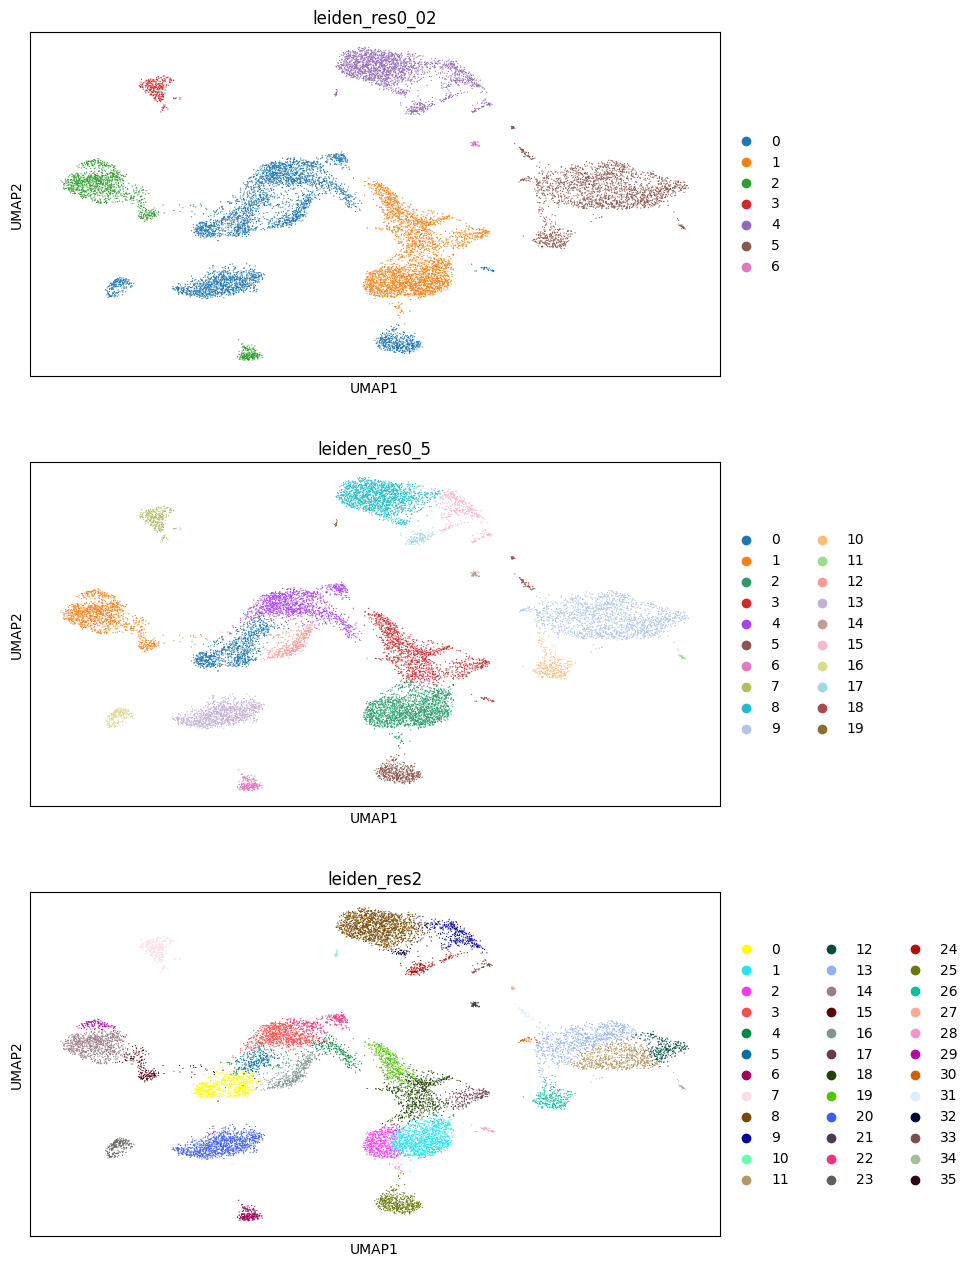

In [62]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res0_02", "leiden_res0_5", "leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

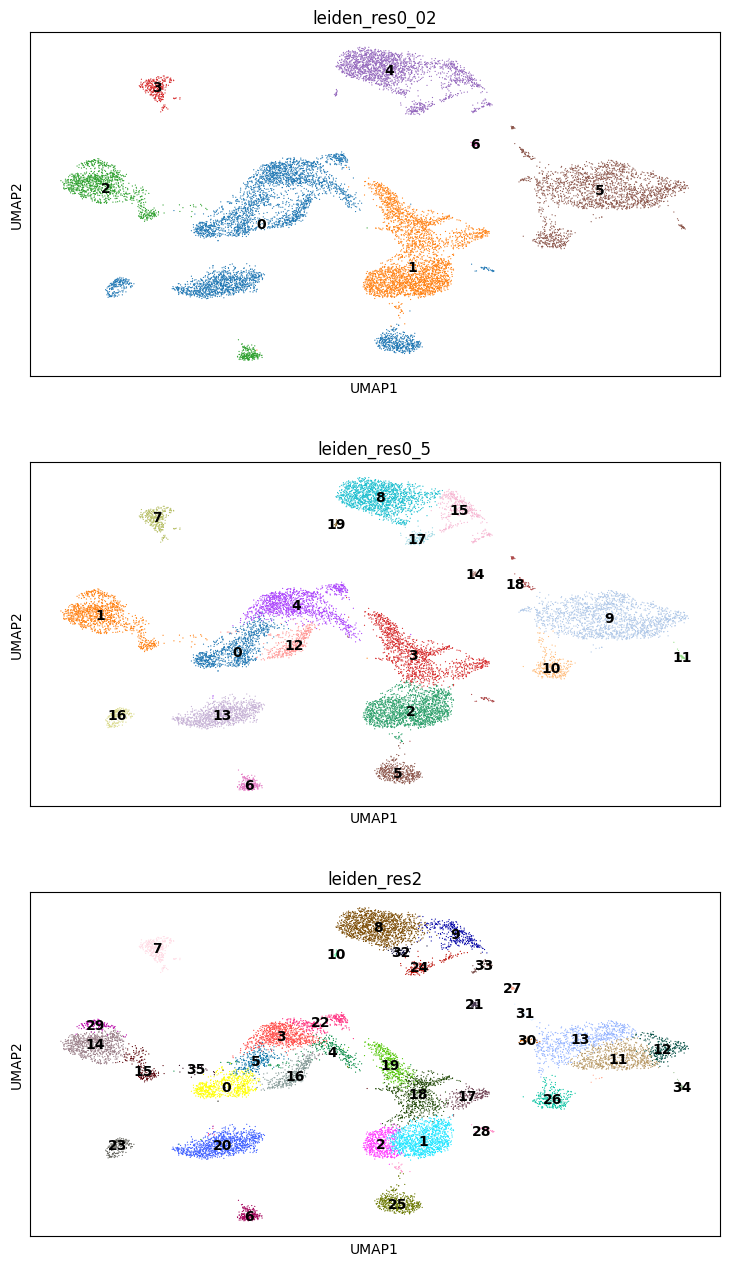

In [63]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res0_02", "leiden_res0_5", "leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1,
    legend_loc="on data"
)

In [ ]:
### Automated cell annotation

In [64]:
import decoupler as dc

In [65]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [66]:
dc.mt.ulm(data=fresh_blood_adata,
          net=markers,
          tmin = 3)

In [67]:
score = dc.pp.get_obsm(fresh_blood_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 13439 × 97
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB', 'log1p_total_counts_HB', 'pct_counts_HB', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res0_02', 'leiden_res0_5', 'leiden_res2'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'predicted_doublet_colors', 'leiden_res0_02', 'leiden_res0_5', 'leiden_res2', 'leiden_res0_02_colors', 'leiden_res0_5_colors', 'leiden_res2_colors'
    obsm: 'X_pca', 'X_umap', 'score_ulm', 'padj_ulm'

In [68]:
fresh_blood_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,Basophils,Bergmann glia,...,Sebocytes,Sertoli cells,Smooth muscle cells,T cells,T follicular helper cells,T helper cells,T regulatory cells,Tanycytes,Thymocytes,Tuft cells
AAACCAAAGAACAGAC-1,-1.024520,-1.157857,-1.122553,3.167727,1.788504,0.051880,-1.991232,-1.919460,0.996606,2.561394,...,-0.970895,-0.943990,0.159336,11.967801,-0.348311,3.556622,-0.233372,-1.024520,3.257220,2.539718
AAACCAAAGCAAGATA-1,-0.851239,-1.066545,1.392907,-0.160084,1.674194,1.649956,-0.657855,0.215860,0.280422,-0.392360,...,-1.204066,-1.446825,-1.446825,6.544548,-0.851239,1.153128,-0.715220,-0.160084,1.384593,1.146025
AAACCAAAGCTGGTTA-1,-0.972659,-0.605491,1.733040,1.533731,1.245965,1.393795,-1.627565,-0.710262,-0.071197,0.367371,...,-0.641492,0.093290,-1.218025,11.277543,-0.972659,1.850920,-1.375830,0.065565,1.963522,2.093752
AAACCAGCACCTAACG-1,-0.975911,-2.175951,1.169892,1.881583,2.208534,-0.181091,-2.086519,-1.618377,1.766395,2.600667,...,0.863481,-2.325356,-0.313729,9.256290,-0.975911,3.394022,-1.380429,-0.975911,2.632058,3.212239
AAACCAGCACGCGTTA-1,-0.365460,-1.407562,1.452857,1.975010,1.530813,1.212177,-0.524691,-0.725068,-0.173370,1.918253,...,0.613889,-1.642448,-1.796702,11.714664,-0.365460,2.828105,-1.366579,-0.365460,3.798206,1.923412


In [69]:
fresh_blood_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive', 'Basophils',
       'Bergmann glia', 'Beta cells', 'Cardiomyocytes', 'Cholangiocytes',
       'Chondrocytes', 'Chromaffin cells', 'Clara cells', 'Crypt cells',
       'Delta cells', 'Dendritic cells', 'Ductal cells',
       'Embryonic stem cells', 'Endothelial cells', 'Enterocytes',
       'Enteroendocrine cells', 'Eosinophils', 'Ependymal cells',
       'Epsilon cells', 'Erythroblasts',
       'Erythroid-like and erythroid precursor cells', 'Fibroblasts',
       'Gamma (PP) cells', 'Gamma delta T cells', 'Gastric chief cells',
       'Germ cells', 'Glomus cells', 'Hematopoietic stem cells', 'Hepatocytes',
       'Immature neurons', 'Intercalated cells', 'Keratinocytes',
       'Kupffer cells', 'Langerhans cells', 'Leydig cells',
       'Loop of Henle cells', 'Luminal epithelial cells', 'Macrophages',
       'Mammary epithelial cells', 'Mast cel

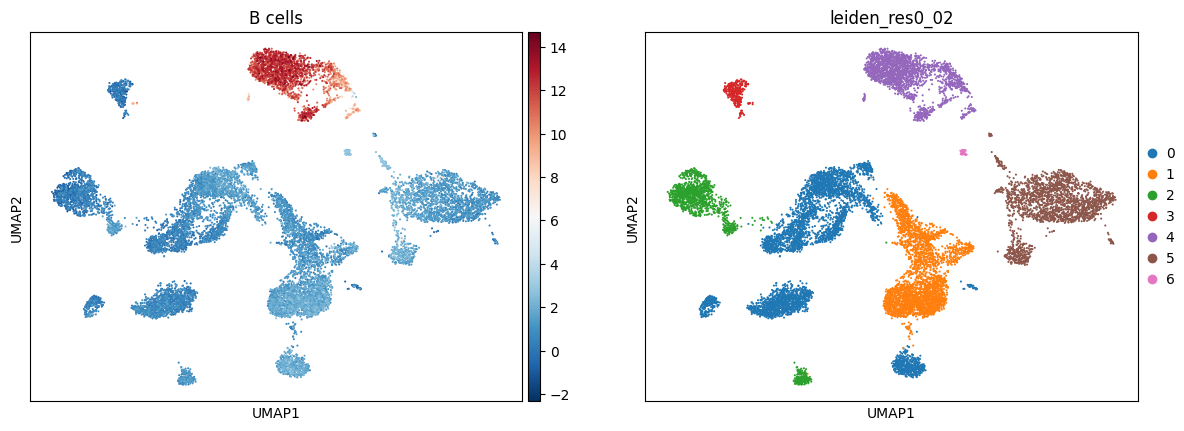

In [70]:
sc.pl.umap(score, color=["B cells", "leiden_res0_02"], cmap="RdBu_r")

In [ ]:
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


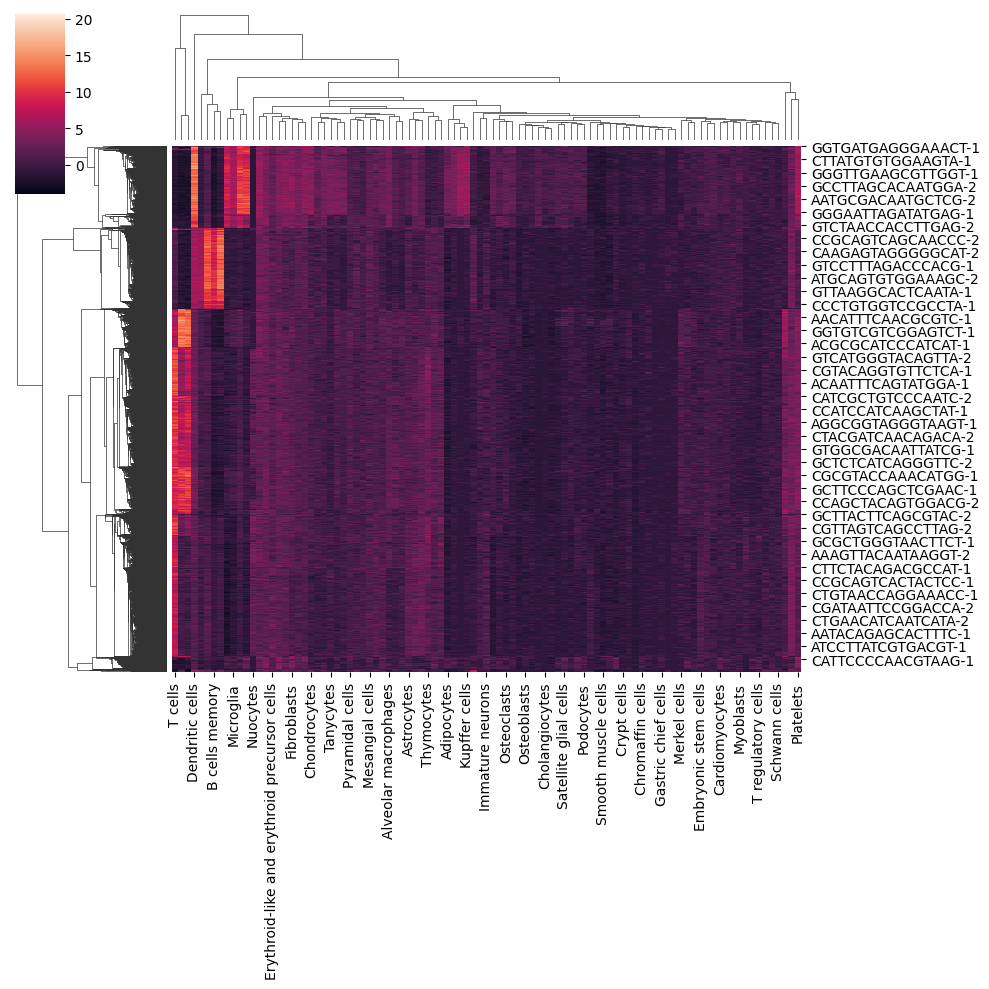

In [ ]:
#heatmap of all cell types

sns.clustermap(fresh_blood_adata.obsm["score_ulm"])

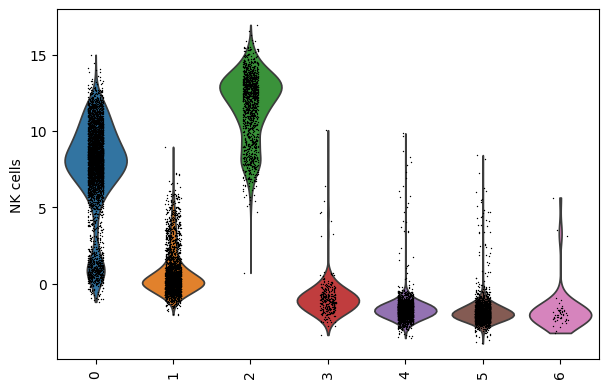

In [ ]:
sc.pl.violin(score, keys=["NK cells"], groupby="leiden_res0_02", rotation=90)

In [ ]:
#Trajectories

In [ ]:
# Example of how to subset for multiple genes in the 'source' column
b_cell_markers = markers[markers['source'].isin(['B cells'])].head()
nk_cell_markers = markers[markers['source'].isin(['NK cells'])].head()
t_cells_markers = markers[markers['source'].isin(['T cells'])].head()

display(b_cell_markers)

,source,target
,,
628,B cells,BACH2
633,B cells,BANK1
656,B cells,BCL11A
739,B cells,BST1
1023,B cells,CCR7


In [ ]:
t_cells_markers

,source,target
,,
640,T cells,BATF3
733,T cells,BRAF
929,T cells,CCL20
949,T cells,CCL4L1
954,T cells,CCL5


In [ ]:
marker_genes_dict = {
    "B cells": b_cell_markers['target']
}

categories: 0, 1, 2, etc.
var_group_labels: B cells


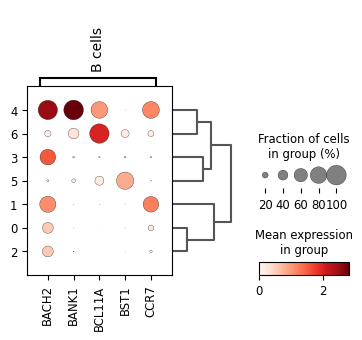

In [ ]:
sc.pl.dotplot(fresh_blood_adata, marker_genes_dict, "leiden_res0_02", dendrogram=True)


categories: 0, 1, 2, etc.
var_group_labels: B cells


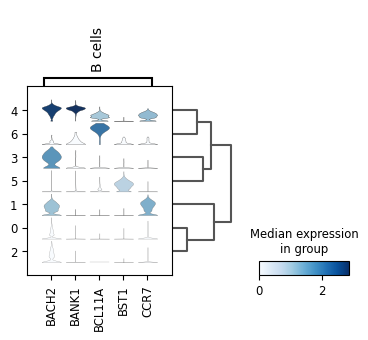

In [ ]:
sc.pl.stacked_violin(
    fresh_blood_adata, marker_genes_dict, groupby="leiden_res0_02",  dendrogram=True
)

categories: 0, 1, 2, etc.
var_group_labels: B cells


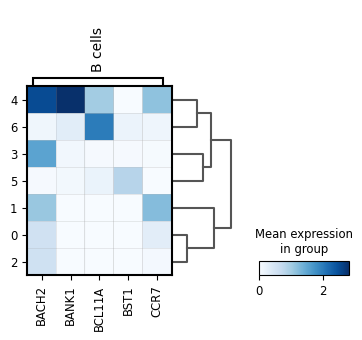

In [ ]:
sc.pl.matrixplot(
    fresh_blood_adata,
    marker_genes_dict,
    "leiden_res0_02",
    dendrogram=True,
    cmap="Blues",
)

categories: 0, 1, 2, etc.
var_group_labels: B cells


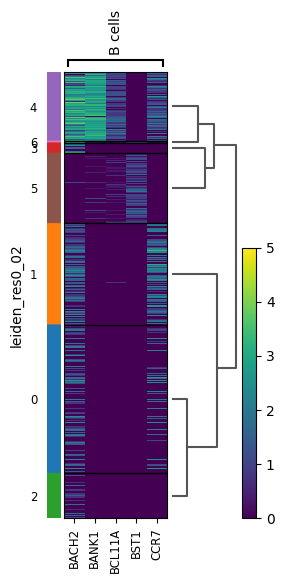

In [ ]:
sc.pl.heatmap(
    fresh_blood_adata, marker_genes_dict, groupby="leiden_res0_02", cmap="viridis", dendrogram=True
)

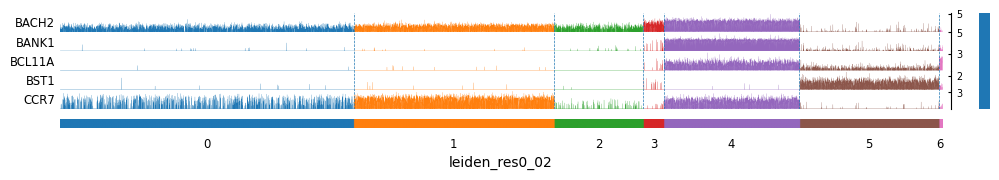

In [ ]:
# @title Default title text
sc.pl.tracksplot(fresh_blood_adata, marker_genes_dict, groupby="leiden_res0_02", dendrogram=False)

In [ ]:
#diff exp + Looking for drug targets